In [1]:
import numpy as np ; import pandas as pd ; import matplotlib.pyplot as plt ; import seaborn as sns
df = pd.read_csv('gurgaon_properties_outlier_treated.csv')
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,house,independent,sector 28,4.50,13889.0,3240.0,Built Up area: 360 (33.45 sq.m.),4,4,0,...,360.0,NaN,0,0,0,0,0,0,0,810.0
1,flat,emaar mgf the palm drive,sector 66,2.80,14359.0,1950.0,Super Built up area 1950(181.16 sq.m.)Built Up...,3,3,2,...,1920.0,1600.0,1,1,0,1,0,2,69,650.0
2,flat,hero homes,sector 104,1.90,11249.0,1689.0,Super Built up area 1689(156.91 sq.m.)Carpet a...,3,3,3,...,NaN,1082.0,0,0,0,1,0,1,103,563.0
3,house,independent,sector 50,10.56,32593.0,3240.0,Plot area 360(301.01 sq.m.),5,5,3,...,3240.0,NaN,0,1,0,0,0,0,20,648.0
4,house,not applicable,sector 11,2.20,12222.0,1800.0,Plot area 1800(167.23 sq.m.),4,3,2,...,1800.0,NaN,1,0,0,1,0,0,24,450.0


In [2]:
pd.set_option('display.max_columns',None)

In [3]:
df.head(3)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,house,independent,sector 28,4.5,13889.0,3240.0,Built Up area: 360 (33.45 sq.m.),4,4,0,4.0,NaN,Undefined,NaN,360.0,NaN,0,0,0,0,0,0,0,810.0
1,flat,emaar mgf the palm drive,sector 66,2.8,14359.0,1950.0,Super Built up area 1950(181.16 sq.m.)Built Up...,3,3,2,12.0,East,New Property,1950.0,1920.0,1600.0,1,1,0,1,0,2,69,650.0
2,flat,hero homes,sector 104,1.9,11249.0,1689.0,Super Built up area 1689(156.91 sq.m.)Carpet a...,3,3,3,16.0,NaN,Under Construction,1689.0,NaN,1082.0,0,0,0,1,0,1,103,563.0


In [4]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 20
facing                 1005
agePossession             0
super_built_up_area    1672
built_up_area          1963
carpet_area            1708
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

## built_up area

<Axes: xlabel='built_up_area', ylabel='super_built_up_area'>

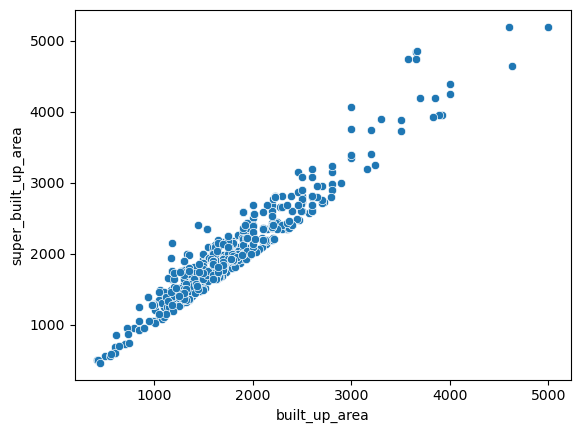

In [5]:
sns.scatterplot( data = df , y='super_built_up_area',x= 'built_up_area' )

<Axes: xlabel='built_up_area', ylabel='carpet_area'>

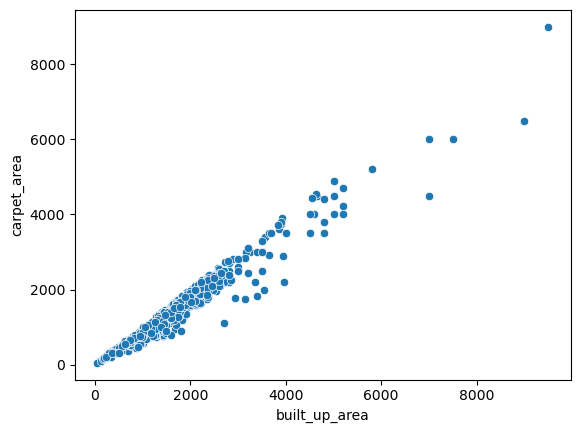

In [6]:
sns.scatterplot(data=df, x= 'built_up_area', y= 'carpet_area')

In [7]:
all_present_df = df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))]
all_present_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
1,flat,emaar mgf the palm drive,sector 66,2.80,14359.0,1950.0,Super Built up area 1950(181.16 sq.m.)Built Up...,3,3,2,12.0,East,New Property,1950.0,1920.0,1600.0,1,1,0,1,0,2,69,650.000000
15,flat,ss the leaf,sector 85,1.87,7779.0,2404.0,Super Built up area 2408(223.71 sq.m.)Built Up...,3,4,3,7.0,North-East,Relatively New,2408.0,2225.0,2175.0,0,0,0,0,0,0,49,801.333333
32,flat,smart world orchard,sector 61,1.90,22700.0,837.0,Super Built up area 1398(129.88 sq.m.)Built Up...,3,3,3,1.0,NaN,New Property,1398.0,1137.0,837.0,0,0,0,0,0,0,30,279.000000
40,flat,unitech fresco,sector 50,1.80,9590.0,1877.0,Super Built up area 1877(174.38 sq.m.)Built Up...,3,4,3+,6.0,North-East,Moderately Old,1877.0,1870.0,1600.0,0,1,0,0,0,1,174,625.666667
42,flat,ansal heights,sector 92,0.72,4500.0,1600.0,Super Built up area 1935(179.77 sq.m.)Built Up...,3,3,3,9.0,South-West,Relatively New,1935.0,1700.0,1600.0,0,1,0,0,0,0,49,533.333333


In [8]:
all_present_df.shape

(531, 24)

In [9]:
super_to_built_up_ratio = ( all_present_df['super_built_up_area'] / all_present_df['built_up_area'] ).median()

In [10]:
carpet_to_built_up_ratio = (all_present_df['carpet_area']/all_present_df['built_up_area']).median()

In [11]:
print(super_to_built_up_ratio, carpet_to_built_up_ratio)

1.105263157894737 0.9


In [12]:
# both present built up null
sbc_df = df[ ~(df['super_built_up_area'].isnull() ) & (df['built_up_area'].isnull() ) & ~(df['carpet_area'].isnull() ) ]
sbc_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
2,flat,hero homes,sector 104,1.90,11249.0,1689.0,Super Built up area 1689(156.91 sq.m.)Carpet a...,3,3,3,16.0,NaN,Under Construction,1689.0,NaN,1082.0,0,0,0,1,0,1,103,563.000000
6,flat,avl 36 gurgaon,sector 36a,0.75,7500.0,1000.0,Super Built up area 1000(92.9 sq.m.)Carpet are...,2,2,2,5.0,North-East,Relatively New,1000.0,NaN,727.0,0,0,0,0,0,0,26,500.000000
7,flat,bestech park view sanskruti,sector 92,1.68,11053.0,1520.0,Super Built up area 2120(196.95 sq.m.)Carpet a...,3,4,3+,15.0,East,Relatively New,2120.0,NaN,1520.0,0,1,0,0,0,1,174,506.666667
20,flat,pareena mi casa,sector 68,1.10,9016.0,1220.0,Super Built up area 1245(115.66 sq.m.)Carpet a...,2,2,3,13.0,East,New Property,1245.0,NaN,1225.0,0,0,0,0,0,0,106,610.000000
24,flat,tarc maceo,sector 91,1.50,6466.0,2320.0,Super Built up area 2320(215.54 sq.m.)Carpet a...,3,4,3+,3.0,North-West,Relatively New,2320.0,NaN,1325.0,1,1,0,0,0,0,112,773.333333


In [13]:
#STOPPPPPPPPPPPPP
sbc_df['built_up_area'].fillna( round( ( (sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9) )/2 ) ,inplace=True )

C:\Users\ritik\AppData\Local\Temp\ipykernel_17200\1725353004.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sbc_df['built_up_area'].fillna( round( ( (sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9) )/2 ) ,inplace=True )


In [14]:
sbc_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
2,flat,hero homes,sector 104,1.90,11249.0,1689.0,Super Built up area 1689(156.91 sq.m.)Carpet a...,3,3,3,16.0,NaN,Under Construction,1689.0,1365.0,1082.0,0,0,0,1,0,1,103,563.000000
6,flat,avl 36 gurgaon,sector 36a,0.75,7500.0,1000.0,Super Built up area 1000(92.9 sq.m.)Carpet are...,2,2,2,5.0,North-East,Relatively New,1000.0,856.0,727.0,0,0,0,0,0,0,26,500.000000
7,flat,bestech park view sanskruti,sector 92,1.68,11053.0,1520.0,Super Built up area 2120(196.95 sq.m.)Carpet a...,3,4,3+,15.0,East,Relatively New,2120.0,1804.0,1520.0,0,1,0,0,0,1,174,506.666667
20,flat,pareena mi casa,sector 68,1.10,9016.0,1220.0,Super Built up area 1245(115.66 sq.m.)Carpet a...,2,2,3,13.0,East,New Property,1245.0,1244.0,1225.0,0,0,0,0,0,0,106,610.000000
24,flat,tarc maceo,sector 91,1.50,6466.0,2320.0,Super Built up area 2320(215.54 sq.m.)Carpet a...,3,4,3+,3.0,North-West,Relatively New,2320.0,1786.0,1325.0,1,1,0,0,0,0,112,773.333333


In [15]:
df.update(sbc_df)

In [16]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 20
facing                 1005
agePossession             0
super_built_up_area    1672
built_up_area          1542
carpet_area            1708
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [17]:
# sb->p , b->p, c->a
c_df= df[ ( df['super_built_up_area'].isnull() ) & ( df['built_up_area'].isnull() ) & ~( df['carpet_area'].isnull() ) ]
c_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
11,flat,aipl zen residences,sector 70a,1.25,9905.0,1262.0,Carpet area: 1262 (117.24 sq.m.),2,2,3,19.0,NaN,Undefined,NaN,NaN,1262.0,0,0,0,0,0,0,0,631.000000
12,flat,godrej nature plus,sector 33,1.25,9025.0,1385.0,Carpet area: 1385 (128.67 sq.m.),2,2,3+,15.0,NaN,Under Construction,NaN,NaN,1385.0,0,0,0,0,0,0,44,692.500000
18,flat,supertech hues,sector 68,1.00,8475.0,1180.0,Carpet area: 1180 (109.63 sq.m.),2,2,3,23.0,NaN,New Property,NaN,NaN,1180.0,0,0,0,0,0,0,49,590.000000
28,flat,jammu and kashmir bank employees cghs,sector 9a,0.94,6065.0,1550.0,Carpet area: 1550 (144 sq.m.),3,3,2,5.0,East,Moderately Old,NaN,NaN,1550.0,0,0,0,0,0,1,85,516.666667
39,flat,the penthouses at the hibiscus,sector 50,8.00,8888.0,9001.0,Carpet area: 9000 (836.13 sq.m.),4,3,3,7.0,South-East,Moderately Old,NaN,NaN,9000.0,0,1,0,0,0,0,35,2250.250000


In [18]:
# sb present c is null built up null
sb_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull())]

In [19]:
sb_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
10,flat,silverglades hightown residences,sector 43,4.20,19765.0,2125.0,Super Built up area 2150(199.74 sq.m.),3,4,2,7.0,East,Under Construction,2150.0,NaN,NaN,0,0,0,0,0,0,42,708.333333
13,flat,godrej,sector 79,2.01,8495.0,2366.0,Super Built up area 2366(219.81 sq.m.),3,4,3+,6.0,East,Relatively New,2366.0,NaN,NaN,0,1,0,0,0,0,158,788.666667
17,flat,ats tourmaline,sector 109,1.40,8000.0,1750.0,Super Built up area 1750(162.58 sq.m.),3,3,3+,9.0,East,Relatively New,1750.0,NaN,NaN,0,0,0,0,0,0,95,583.333333
19,flat,godrej summit,sector 104,0.98,5950.0,1647.0,Super Built up area 1647(153.01 sq.m.),3,3,3,12.0,East,Relatively New,1647.0,NaN,NaN,0,0,0,0,1,0,79,549.000000
21,flat,aipl zen residences,sector 70a,1.65,13074.0,1262.0,Super Built up area 1262(117.24 sq.m.),2,2,3,23.0,North-West,New Property,1262.0,NaN,NaN,0,0,0,0,0,0,81,631.000000


In [20]:
sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105),inplace=True)

C:\Users\ritik\AppData\Local\Temp\ipykernel_17200\1714170073.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105),inplace=True)


In [21]:
sb_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
10,flat,silverglades hightown residences,sector 43,4.20,19765.0,2125.0,Super Built up area 2150(199.74 sq.m.),3,4,2,7.0,East,Under Construction,2150.0,1946.0,NaN,0,0,0,0,0,0,42,708.333333
13,flat,godrej,sector 79,2.01,8495.0,2366.0,Super Built up area 2366(219.81 sq.m.),3,4,3+,6.0,East,Relatively New,2366.0,2141.0,NaN,0,1,0,0,0,0,158,788.666667
17,flat,ats tourmaline,sector 109,1.40,8000.0,1750.0,Super Built up area 1750(162.58 sq.m.),3,3,3+,9.0,East,Relatively New,1750.0,1584.0,NaN,0,0,0,0,0,0,95,583.333333
19,flat,godrej summit,sector 104,0.98,5950.0,1647.0,Super Built up area 1647(153.01 sq.m.),3,3,3,12.0,East,Relatively New,1647.0,1490.0,NaN,0,0,0,0,1,0,79,549.000000
21,flat,aipl zen residences,sector 70a,1.65,13074.0,1262.0,Super Built up area 1262(117.24 sq.m.),2,2,3,23.0,North-West,New Property,1262.0,1142.0,NaN,0,0,0,0,0,0,81,631.000000


In [22]:
df.update(sb_df)

In [23]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 20
facing                 1005
agePossession             0
super_built_up_area    1672
built_up_area           669
carpet_area            1708
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [24]:
# sb null c is present built up null
c_df = df[(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [25]:
c_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
11,flat,aipl zen residences,sector 70a,1.25,9905.0,1262.0,Carpet area: 1262 (117.24 sq.m.),2,2,3,19.0,NaN,Undefined,NaN,NaN,1262.0,0,0,0,0,0,0,0,631.000000
12,flat,godrej nature plus,sector 33,1.25,9025.0,1385.0,Carpet area: 1385 (128.67 sq.m.),2,2,3+,15.0,NaN,Under Construction,NaN,NaN,1385.0,0,0,0,0,0,0,44,692.500000
18,flat,supertech hues,sector 68,1.00,8475.0,1180.0,Carpet area: 1180 (109.63 sq.m.),2,2,3,23.0,NaN,New Property,NaN,NaN,1180.0,0,0,0,0,0,0,49,590.000000
28,flat,jammu and kashmir bank employees cghs,sector 9a,0.94,6065.0,1550.0,Carpet area: 1550 (144 sq.m.),3,3,2,5.0,East,Moderately Old,NaN,NaN,1550.0,0,0,0,0,0,1,85,516.666667
39,flat,the penthouses at the hibiscus,sector 50,8.00,8888.0,9001.0,Carpet area: 9000 (836.13 sq.m.),4,3,3,7.0,South-East,Moderately Old,NaN,NaN,9000.0,0,1,0,0,0,0,35,2250.250000


In [26]:
c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)

C:\Users\ritik\AppData\Local\Temp\ipykernel_17200\2136919732.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)


In [27]:
df.update(c_df)

In [28]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 20
facing                 1005
agePossession             0
super_built_up_area    1672
built_up_area             0
carpet_area            1708
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

<Axes: xlabel='built_up_area', ylabel='price'>

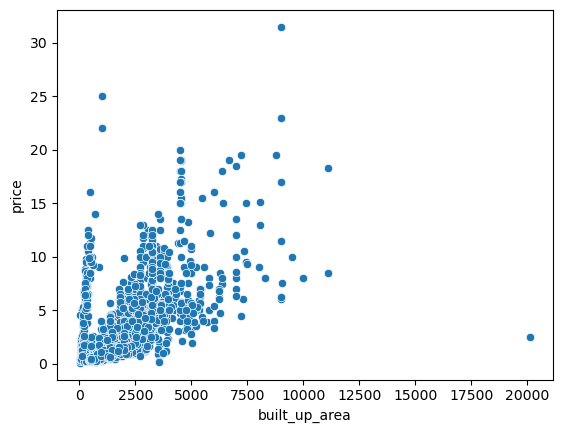

In [29]:
sns.scatterplot(data = df , x = 'built_up_area', y = 'price' )

In [30]:
anamoly_df = df[ (df['built_up_area'] < 2000 ) & (df['price'] > 2.5) ][['price','area','built_up_area']]
anamoly_df.shape

(275, 3)

In [31]:
anamoly_df.sample(5)

,price,area,built_up_area
1263,7.10,2259.0,240.0
149,3.75,1701.0,1701.0
3332,6.50,1800.0,1800.0
1385,3.80,1458.0,162.0
922,4.25,1836.0,1836.0


In [32]:
anamoly_df['built_up_area'] = anamoly_df['area']

In [33]:
df.update(anamoly_df)

<Axes: xlabel='built_up_area', ylabel='price'>

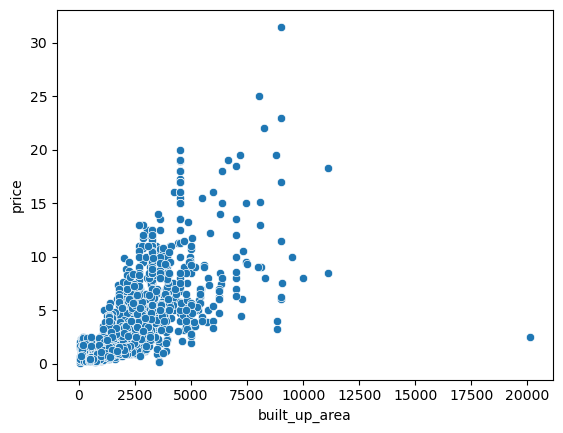

In [34]:
sns.scatterplot(data = df,x = 'built_up_area',y= 'price')

In [35]:
df[df['built_up_area']>17500]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
682,flat,godrej air,sector 85,2.5,13797.0,1812.0,Carpet area: 18122 (1683.59 sq.m.),4,5,3+,16.0,North-East,Under Construction,NaN,20136.0,18122.0,1,0,0,1,1,1,44,453.0


In [36]:
df[df['built_up_area']<17500].shape

(3544, 24)

In [37]:
df = df[df['built_up_area']<17500]
df.shape

(3544, 24)

In [38]:
df.drop( columns=['area','areaWithType','super_built_up_area','carpet_area','area_room_ratio'], inplace=True )

In [39]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,house,independent,sector 28,4.50,13889.0,4,4,0,4.0,NaN,Undefined,3240.0,0,0,0,0,0,0,0
1,flat,emaar mgf the palm drive,sector 66,2.80,14359.0,3,3,2,12.0,East,New Property,1950.0,1,1,0,1,0,2,69
2,flat,hero homes,sector 104,1.90,11249.0,3,3,3,16.0,NaN,Under Construction,1365.0,0,0,0,1,0,1,103
3,house,independent,sector 50,10.56,32593.0,5,5,3,3.0,NaN,Moderately Old,3240.0,0,1,0,0,0,0,20
4,house,not applicable,sector 11,2.20,12222.0,4,3,2,1.0,South,Old Property,1800.0,1,0,0,1,0,0,24


In [40]:
df.isnull().sum()

property_type         0
society               1
sector                0
price                 0
price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
floorNum             20
facing             1005
agePossession         0
built_up_area         0
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

In [41]:
df[df['floorNum'].isnull()]

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
203,house,jacob pura,sector 12,0.35,9722.0,2,1,0,NaN,NaN,Old Property,360.0,0,0,0,0,0,0,0
307,house,independent,sector 4,4.12,8889.0,2,1,3+,NaN,NaN,Moderately Old,4635.0,0,0,0,0,0,0,0
360,flat,"ganpati apartment 2, laxman vihar phase 1",sector 4,0.45,4707.0,2,2,1,NaN,East,Relatively New,944.0,0,0,0,0,0,0,46
539,house,independent,sector 2,5.60,17284.0,8,6,3+,NaN,South-West,Moderately Old,3240.0,1,1,1,1,0,0,0
729,house,independent,sector 4,0.65,11111.0,4,2,2,NaN,NaN,Moderately Old,585.0,0,0,0,0,0,0,0
1278,house,dlf new town heights,sector 86,2.47,7719.0,4,4,3+,NaN,West,Moderately Old,2800.0,0,1,0,1,0,1,130
1481,house,independent,sector 24,1.45,2984.0,3,3,1,NaN,NaN,Old Property,540.0,0,0,0,0,0,0,9
1494,flat,apna enclave,sector 3,0.80,6154.0,3,3,1,NaN,NaN,Old Property,1000.0,0,0,0,0,0,0,0
1556,house,independent,sector 26,4.60,12198.0,4,4,3+,NaN,NaN,Old Property,3771.0,0,0,0,0,0,0,28
1642,house,vipul tatvam villa,sector 48,8.50,26235.0,4,4,1,NaN,NaN,Relatively New,3240.0,0,0,0,0,0,0,21


In [42]:
df[df['property_type']=='house']['floorNum'].median()

2.0

In [43]:
df['floorNum'].fillna(2.0 ,inplace = True)

In [44]:
df.isnull().sum()

property_type         0
society               1
sector                0
price                 0
price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
floorNum              0
facing             1005
agePossession         0
built_up_area         0
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

In [45]:
1005/df.shape[0]  # 28% data is only availabe for facing col. therefore droping the column

0.28357787810383744

## facing

<Axes: ylabel='count'>

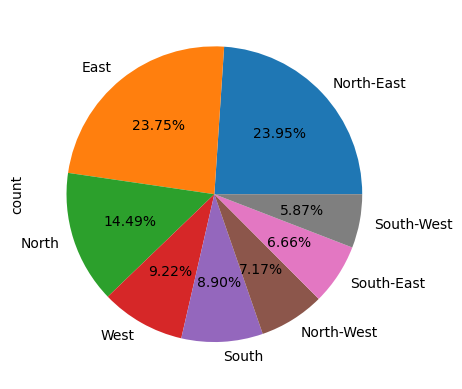

In [46]:
df['facing'].value_counts().plot(kind='pie',autopct= '%0.2f%%')

In [47]:
df.drop(columns=['facing'],inplace=True)

In [48]:
df.sample(5)

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1677,flat,dlf the skycourt,sector 86,1.35,6998.0,3,3,1,9.0,Relatively New,1746.0,0,0,0,0,0,0,119
2809,flat,vatika lifestyle homes,sector 83,1.25,6838.0,3,2,1,6.0,Relatively New,1654.0,1,1,1,1,0,2,174
3260,flat,indiabulls enigma,sector 110,4.10,10567.0,5,5,2,10.0,Relatively New,3500.0,0,1,0,0,0,0,159
717,flat,shapoorji pallonji joyville gurugram,sector 102,0.95,10383.0,2,2,2,14.0,Undefined,915.0,0,0,0,0,0,0,0
3306,house,independent,sector 2,6.00,24691.0,5,6,3+,3.0,Old Property,2430.0,1,0,0,1,1,1,43


In [49]:
df.isnull().sum()

property_type      0
society            1
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [50]:
# society 
df[df['society'].isnull() ]

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3341,flat,NaN,sector 78,0.6,3692.0,2,2,0,2.0,Under Construction,1625.0,0,0,0,0,0,0,0


In [51]:
df.drop(index=[3341],inplace=True)

In [52]:
df.isnull().sum()

property_type      0
society            0
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [53]:
df.shape

(3543, 18)

## agePossession 
### we have undefined category so we need to treat it 

In [54]:
df.agePossession.value_counts()

agePossession
Relatively New        1604
New Property           556
Moderately Old         542
Old Property           291
Undefined              289
Under Construction     261
Name: count, dtype: int64

In [55]:
df[df.agePossession=='Undefined']

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,house,independent,sector 28,4.50,13889.0,4,4,0,4.0,Undefined,3240.0,0,0,0,0,0,0,0
11,flat,aipl zen residences,sector 70a,1.25,9905.0,2,2,3,19.0,Undefined,1402.0,0,0,0,0,0,0,0
16,flat,baani city center,sector 63,0.88,10945.0,1,1,2,4.0,Undefined,804.0,0,0,0,0,0,0,0
31,house,dlf the grove,sector 54,5.70,23457.0,4,4,0,1.0,Undefined,2430.0,0,0,0,0,0,0,46
37,flat,"godrej 101, sector 79",sector 79,1.25,9038.0,2,2,3,1.0,Undefined,1383.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3497,house,independent,sector 13,0.45,4808.0,1,1,0,1.0,Undefined,936.0,0,0,0,0,0,0,0
3518,flat,ramson kshitij sec-95 gurugram,sector 95,0.27,2700.0,2,2,0,1.0,Undefined,758.0,0,0,0,0,0,0,0
3521,house,bhim garh kheri,sector 3,1.50,7576.0,7,2,0,1.0,Undefined,1980.0,0,0,0,0,0,0,0
3534,house,independent,sector 4,1.10,11111.0,3,4,1,2.0,Undefined,990.0,0,0,0,0,0,0,0


In [57]:
def mode_based_imputation(row):
    if row['agePossession']=='Undefind' :
        mode_value = df[ (df['sector'] == row['sector'] ) & ( df['property_type']==row['property_type'] ) ]['agePossession'].mode()
                # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [58]:
df['agePossession'] = df.apply(mode_based_imputation,axis=1)

In [59]:
df['agePossession'].value_counts()

agePossession
Relatively New        1604
New Property           556
Moderately Old         542
Old Property           291
Undefined              289
Under Construction     261
Name: count, dtype: int64

In [60]:
def mode_based_imputation2(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [61]:
df['agePossession'] = df.apply(mode_based_imputation2,axis=1)

In [62]:
df['agePossession'].value_counts()

agePossession
Relatively New        1723
New Property           595
Moderately Old         587
Old Property           328
Under Construction     277
Undefined               33
Name: count, dtype: int64

In [63]:
def mode_based_imputation3(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [64]:
df['agePossession'] = df.apply(mode_based_imputation3,axis=1)

In [65]:
df['agePossession'].value_counts()

agePossession
Relatively New        1727
Moderately Old         616
New Property           595
Old Property           328
Under Construction     277
Name: count, dtype: int64

In [66]:
df.isnull().sum()

property_type      0
society            0
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [67]:
df.to_csv('gurgaon_properties_missing_value_imputation.csv',index=False)

In [68]:
df.shape

(3543, 18)